In [17]:
import matplotlib.pyplot as plt
import numpy as np

## QUESTION 1

#### Get URLs and save them in a text file

In [2]:
# import library
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re
import requests

f = open("urls.txt","w")


for k in range(1,401):

    
    page = requests.get("https://www.atlasobscura.com/places?page="+str(k)+'&sort=likes_count') # select the page
    soup = BeautifulSoup(page.content, features="lxml") # take the content from the page


    links = []
    for link in soup.findAll('a'):
        links.append(link.get('href'))


    while(len(links)>30):
    
        #remove None values
        while(None in links):
            links.remove(None)

        #clean list
        while('/places/new' in links):
            links.remove('/places/new')

        #remove urls from places in different categories
        for link in links:
    
            if (link[:8]!='/places/'):
                links.remove(link)

    if ("/places/" not in links[-1]): links.pop()

    links = links[9:] #remove urls from places in different categories


    for i in range(len(links)):

        links[i] = 'https://www.atlasobscura.com' + links[i] +'\n'
        f.write(links[i])



f.close()

#### Get HTMLs and organize them: each folder contains 18 html files corresponding to each webpage

In [ ]:
with open('urls.txt') as fh:
    all_links = fh.read().split('\n')

cont_pages = 0
name_pages = 0
cont_folder = 1 

#create directory if not already present
if not os.path.exists('folder{}'.format(str(cont_folder))):
    os.mkdir('folder{}'.format(str(cont_folder)))
    
    
for line in all_links:
    if cont_pages > 18:
        cont_folder += 1
        os.mkdir('folder{}'.format(str(cont_folder)))
        cont_pages = 0

    print("LINE: " +line)
    HTML = requests.get(line, allow_redirects=False, timeout=3) #request html
    soup = bs4.BeautifulSoup(HTML.content, features="lxml")
    
    #write html
    with open(str('folder{}'.format(str(cont_folder)))+'/place'+str(name_pages)+'.txt', 'w') as f:
        f.write(str(soup.prettify()))
        f.close()
        cont_pages += 1
        name_pages += 1

#### Parsde downloaded pages

In [ ]:
#automate the process of scraping for whole pages
#we dont need to create a text file should already have it
#but for now we try on single url

def extract_info(html):
    soup = bs4.BeautifulSoup(html)
    
    try:
        placeName.append(soup.find_all('h1', {'class' : 'DDPage__header-title'})[0].contents[0])
    except:
        placeName.append('')
    #place tags        
    placeTags1 = [x.text for x in soup.find_all('span',{'class':'itemTags__tag js-item-tags-tag itemTags__tag--light itemTags__tag--rounded'})]
    try:            
        placeTags.append([x.replace('\n','') for x in placeTags1])
    except:
        placeTags.append('')
    
    #N of people who visited
    try:
        numPeopleVisited.append(int(soup.find_all('div', {'class' : "title-md item-action-count"})[0].contents[0]))
    except:
        numPeopleVisited.append('')
    
    #number of people who want to go
    try:
        numPeopleWant.append(int(soup.find_all('div', {'class' : "title-md item-action-count"})[1].contents[0]))
    except:
        numPeopleWant.append('')
        
    #full description
    try:
        long_desc = [x.text for x in soup.find_all('div',{'id':'place-body'})]
        clean_desc = [x.replace('\n','') for x in long_desc]
        placeDesc.append(clean_desc)
    except:
        placeDesc.append('')
    
    #short description of the place
    try:
        placeShortDesc.append(soup.find_all('h3', {'class' : 'DDPage__header-dek'})[0].contents[0])
    except:
        placeShortDesc.append('')
        
    #the nearby places
    try:
        placeNearby.append([x.text for x in soup.find_all('div', {'class' : 'DDPageSiderailRecirc__item-title'})])
    except:
        placeNearby.append('')
        
    #address of the place
    try:
        placeA =[x.text for x in soup.find_all('address', {'class' : 'DDPageSiderail__address'})]
        placeAd = [x.replace('\n','') for x in placeA]
        placeAddress.append(placeAd[0])
    except:
        placeAddress.append('')

    #finding the coordinates of the place        
    try:
        #this creates a list and divides the coordinates in Altitude & longitude
        placeAlt1 = [x.get('data-coordinates') for x in soup.find_all('div',{'class':'DDPageSiderail__coordinates js-copy-coordinates'})]
        newAlt = [coordinates.replace(',','') for string in placeAlt1 for coordinates in string.split()]
    
        placeAlt.append(float(newAlt[0]))
        placeLong.append(float(newAlt[1]))
    except:
        placeAlt.append('')
        placeLong.append('')
    
    #finding the editors for the page
    try:
        editors = [x.text for x in soup.find_all('a',{'class':'DDPContributorsList__contributor'})]
        editors_clean = [x.replace('\n','') for x in editors]
        placeEditors.append(editors_clean)
    except:
        placeEditors.append('')
    
    #date of pubblication of the post
    try:
        Date = soup.find_all('div', {'class' : "DDPContributor__name"})[0].contents[0]
        placePubDate1 = Date.replace(',','')
        placePubDate.append(datetime.strptime(placePubDate1,'%B %d %Y'))
    except:
        placePubDate.append('')
    
    #Lists the place was included to
    try:
        placeRL1 = [x.text for x in soup.find_all('h3',{'class':'Card__heading --content-card-v2-title js-title-content'})]
        placeRL = [x.replace('\n', '') for x in placeRL1]
        lun = len(placeRL)
        placeRelatedLists.append(placeRL[lun-2:lun])
    except:
        placeRelatedLists.append('')
        
    #names of the related places
    try:
        placeRL1 = [x.text for x in soup.find_all('h3',{'class':'Card__heading --content-card-v2-title js-title-content'})]
        placeRL = [x.replace('\n', '') for x in placeRL1]
        placeRelatedPlaces.append(placeRL[0:3])
    except:
        placeRelatedPlaces.append('')
        
    #the URL of the place
    try:
        url = [x.get('href') for x in soup.find_all('link', {'rel' : 'canonical'})]
        placeURL.append(url[0])
    except:
        placeURL.append('')

In [ ]:
os.makedirs('tsv_files')

In [ ]:
#we now need to write a function that creates the tsv files.

def tsv_files(i):
    
    #naming the columns in the tsv file
    tsv_columns = ['placeName', 'placeTags', 'numPeopleVisited','numPeopleWant','placeDesc',
                  'placeShortDesc','placeNearby','placeAddress','placeAlt','placeLong','placeEditors',
                  'placePubDate','placeRelatedLists','placeRelatedPlaces','placeURL']
    #getting the row for each tsv file
    data = zip([placeName[cont-1]], [placeTags[cont-1]], [numPeopleVisited[cont-1]],[numPeopleWant[cont-1]],[placeDesc[cont-1]],
                  [placeShortDesc[cont-1]],[placeNearby[cont-1]],[placeAddress[cont-1]],[placeAlt[cont-1]],[placeLong[cont-1]],[placeEditors[cont-1]],
                  [placePubDate[cont-1]],[placeRelatedLists[cont-1]],[placeRelatedPlaces[cont-1]],[placeURL[cont-1]])
    #creating and opening the tsv file
    tsv_name = "tsv_files/place_" +str(i) + ".tsv"
    with open(tsv_name, encoding = 'utf-8', mode = 'w') as tsv_file:
        tsv_output = csv.writer(tsv_file, delimiter='\t')
        tsv_output.writerow(tsv_columns)
        for placeN, placeT, numP,numPW,placeD,placeSD,placeNear,placeAd,placeA,placeL,placeEd,placePubD,placeRL,placeRP,URL in data:
            tsv_output.writerow([placeN, placeT, numP,numPW,placeD,placeSD,placeNear,placeAd,placeA,placeL,placeEd,placePubD,placeRL,placeRP,URL])

In [ ]:
cont_pages = 0
cont_htmlcode = 0

for pages in tqdm(range(0,400)):
    for i in range(1,19):
        path = 'C:/Users/flavi/Homeworks/ADM-HW3/HTML/' + 'page{}'.format(str(pages)) + '/_/' + 'htmlcode{}'.format(str(i)) + '.html'
        f = open(path, encoding="utf8")
        extract_info(f)
        # calling the tsv create function to create tsv 
        tsv_files(cont_htmlcode)
        f.close()
        cont_htmlcode += 1

In [ ]:
#when it blocks remember to eleminate the elements if you restart from a certain point
placeName = []
placeTags = []
numPeopleVisited = []
numPeopleWant = []
placeDesc = []
placeShortDesc = []
placeNearby = []
placeAddress = []
placeAlt = []
placeLong = []
placeEditors = []
placePubDate = []
placeRelatedLists = []
placeRelatedPlaces = []
placeURL = []

## QUESTION 2

## QUESTION 3

## QUESTION 4

#### This are the results of question 3:

![title](Imgs/Q3res.png)

In [106]:
import pandas as pd
import folium
from IPython.core.display import display, HTML

C:\Users\leox-\AppData\Local\Temp\ipykernel_16480\3358614425.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### Locations with names and coordinates

In [110]:
locations = pd.read_csv('Q4_locations.csv')
locations

,location_name,longitude,latitude,city,country
0,Museum of the Weird,30.2670,-97.7387,Austin,Texas
1,Harvard Museum of Natural History,42.3789,-71.1152,Cambridge,Massachusets
2,Off the Rez Cafe,47.6603,-122.3116,Seattle,Washington
3,Laurel Dinosaur Park,39.0708,-76.8686,Laurel,Maryland
4,Frederick R Weisman Art Museum,44.9718,-93.2374,Minneapolis,Minnesota
5,V. C. Morris Gift Shop,37.7883,-122.4059,San Francisco,California
6,Crazy Horse Memorial,43.8368,-103.6244,Custer,South Dakota
7,New Mexico Museum of Space History,32.9216,-105.9206,Alamogordo,New Mexico
8,Museum of Psychphonics,39.7528,-86.1410,Indianapolis,Indiana
9,Thorne Miniature Rooms,41.8796,-87.6237,Chicago,Illinois


#### We start creating the map

In [111]:
world = folium.Map(location = [40,-97],zoom_start=4.9)


for i in range(10):
    
    curr=locations.loc[i]

    folium.Marker(
        location=[curr['longitude'], curr['latitude']],
        popup = curr['location_name']+'.\n'+curr['city']+','+curr['country'],
        tooltip = folium.Tooltip(permanent=True, text=curr['location_name']+'.\n'+curr['city']+','+curr['country'])
    ).add_to(world)



In [112]:
def folium_deepnote_show(m): #function to show map
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))
    
folium_deepnote_show(world)

#### We also put an image file of the produced map in the Imgs folder in any case

## QUESTION 5

## QUESTION 6

## QUESTION 7

#### Data Preparation

In [ ]:
f = open("ApplicationsInfo.txt", 'r')

l = f.readline().split()

n_students = int(l[0])
n_grades = int(l[1])



#build dictionary where key : list of grades

d={}

for i in range(n_students):

    line = f.readline().split()

    if line==[]: break #means that we finished reading the textfile

    name = line[0]+' '+line[1]
    
    d[name] = line[2:]

#calculate grades average for each student

for line in d:

    avg = 0

    
    for i in range(n_grades):
        
        avg+=int(d[line][i])

    avg=round(float(avg/n_grades),2)

    d[line]=avg #update dictionary

print('ok avgs')
l_students = []
l_grades = []


#build list for student names and corresponfìding grades average

for key in d:

    l_students.append(key)

    l_grades.append(d[key])



#### Algorithm 1: Bubble Sort

In [ ]:

def bubbleSort(grades, students):
    n = len(grades)

    swap = False
    
    #iterates through all array elements
    for i in range(n-1):
        
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            #swap if the element found is greater than the next element
            if grades[j] > grades[j + 1]:
                swap = True
                grades[j], grades[j + 1] = grades[j + 1], grades[j]
                students[j], students[j + 1] = students[j + 1], students[j]
         
        if not swap: #the array is sorted

            return


#### Algorithm 2: Dynamic Insertion Sort

#### Pseudocode

create a list new_list 

for each $element$ of input list:

&nbsp;&nbsp;&nbsp;&nbsp; for each $element$ of new_list:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; insert element in new_list where (new_list[i-1] $\leq$ $element$ $\leq$ new_list[i+1])

return new_list

In [2]:
#function to insert element in list at index
def list_insert(l, index, elem): #costs T(7) and Worst Space Complexity is O(n+1)
    
    temp1 = l[:index]
    temp2 = l[index:]
    
    out=[]
    
    if(temp1!=[]): out+=temp1
    
    out.append(elem)
    
    if(temp2!=[]): out+=temp2
    
    return out
    
    


def dynamicInsertion(grades,students):

    out_students=[]
    out_grades=[]
    
    out_students.append(students[0])
    out_grades.append(grades[0])

    for j in range(1,len(grades)): #O(N)

        for i in range(j): #O(log(N))
            
            if (i==0 and grades[j]<=out_grades[i]): #if the element is the smallest of the local output list
                
                
                out_grades = list_insert(out_grades, i, grades[j])
                out_students = list_insert(out_students,i,students[j])

                break
            
            elif (i==j-1 and grades[j]>=out_grades[i]):
                
                out_grades = list_insert(out_grades, i, grades[j])
                out_students = list_insert(out_students,i,students[j])
                
                break
            
            elif (grades[j]>=out_grades[i-1] and grades[j]<=out_grades[i]): #if the element is the greatest of the local output list

                out_grades = list_insert(out_grades, i, grades[j])
                out_students = list_insert(out_students,i,students[j])

                break
                
    return out_grades, out_students

#### Algorithm 3: Merge Sort

In [ ]:
def mergeSort(grades,students):
    if len(grades) > 1:
 
        #middle of array
        mid = len(grades)//2
 
        #split into 2 halves
        left_g = grades[:mid] #diuviding grades array
        left_s = students[:mid] #dividing students array
 
        #split into 2 halves
        right_g = grades[mid:]
        right_s = students[mid:]
 
        #sort first half
        mergeSort(left_g, left_s)
 
        #sort second half
        mergeSort(right_g, right_s)
 
        i = j = k = 0
 
        #copy arrays to temp arrays left[] and right[]
        while i < len(left_g) and j < len(right_g):
            if left_g[i] <= right_g[j]:
                grades[k] = left_g[i]
                students[k] = left_s[i]
                i += 1
            else:
                grades[k] = right_g[j]
                students[k] = right_s[j]
                j += 1
            k += 1
 
        #check if any element was left
        while i < len(left_g):
            grades[k] = left_g[i]
            students[k] = left_s[i]
            i += 1
            k += 1
 
        while j < len(right_g):
            grades[k] = right_g[j]

            print(students,right_s)
            
            students[k] = right_s[j]
            j += 1
            k += 1
 


#### Best and Worst case complexities

$Bubble Sort$: 

The Bubble Sort Algorithm has the fastest best case complexity of $O(N)$ as it has to perform N checks. This means the array is already sorted.
for worst case we get that both the internal and external loop are going to iterate $N$ times each, for a total time complexity of $O(N^2)$.

$Dynamic Insertion Sort$: 

For best case this algorithm also has to perform N checks, so it has a best case complexity of $O(N)$.
For worst case, assuming that the internal loop has time complexity of $O(log(N))$ because it's number of iterations goes from 1 to n for each iteration of the external loop, which also takes $N$ iterations. Complexity is $O(N \times log(N))$.

$Merge Sort$: 

The Merge Sort has the same complexity for best, average and worst case, which is always $O(N  log(N))$.

Keep in mind that worst case complexity is far more important than best case complexity.

#### Running Times

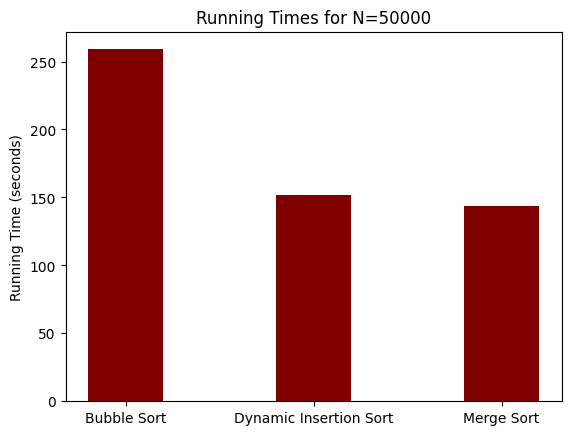

In [20]:
# creating the bar plot

algorithms = ['Bubble Sort', 'Dynamic Insertion Sort', 'Merge Sort']
times = [259.02, 151.49, 143.85]

plt.bar(algorithms,times, color ='maroon',
        width = 0.4)
 

plt.ylabel("Running Time (seconds)")
plt.title("Running Times for N=50000")
plt.show()

#### Most optimal algorithm

The most optimal algorithm is Algorithm 3: Merge Sort for two reasons. 

First, it has the lowest running time of 143.85 seconds and an asymptotycal time complexity of $O(N \times log(N))$ like the Dynamic Insertion Sort, but it also has a lower space complexity because it does not need to create an array of length N while the Dynamic Insertion Sort needs an average of $log(N)$ space and it needs $O(N)$ space complexity to output the sorted list.

#### Map Reduce